# Simulate and Generate Empirical Distributions in Python
## Mini-Lab: Simulations, Empirical Distributions, Sampling

Welcome to your next mini-lab! Go ahead an run the following cell to get started. You can do that by clicking on the cell and then clickcing `Run` on the top bar. You can also just press `Shift` + `Enter` to run the cell.

In [1]:
from datascience import *
import numpy as np
import random
import otter

grader = otter.Notebook("m6_l1_tests")

Let's continue our analysis of COVID-19 data with the same false negative and false positive values of 10% and 5%. For the first task, let's try and create a sample population with 10,000 people. Let's say that 20% of this population has COVID-19. Replace the `...` in function below to create this sample population. The `create_population` function takes in an input `n` and returns a table with `n` rows. These rows can either have `positive` or `negative` as their value. These values indicate whether or not an individual has COVID-19.

For random number generation, feel free to look up the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html) or the [Python random documentation](https://docs.python.org/3.8/library/random.html).

COVID-19
positive
negative
positive
negative
positive


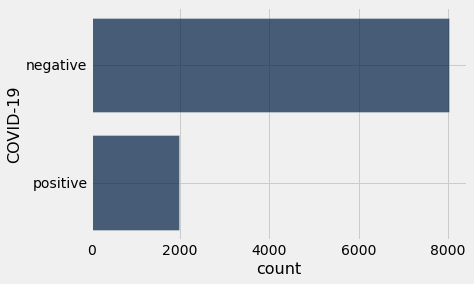

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

def create_population(n):
    test_results = make_array()
    for i in np.arange(n):
        random_num = np.random.choice(np.arange(10))
        if random_num < 2:
            disease_result = 'positive'
        else:
            disease_result = 'negative'
        test_results = np.append(test_results, disease_result)
        
    return Table().with_column("COVID-19", test_results)

covid_population = create_population(10000)
covid_population.show(5)
covid_population.group("COVID-19").barh("COVID-19")

In [ ]:
# There is a chance that this test may fail even with a correct solution due to randomness! 
# Run the above cell again and run the grader again if you think this is the case.
grader.check("q1")

Given this population, let's go ahead and randomly test 1000 members. Complete `test_population` below by replacing the `...` with functional code. This function takes in a `population` which is a `datascience` table and a number `n`, where `n` is the number of people that we are testing. Inside the function, we add a column to this table called `Test Results` which contains the test result for each person in the sample based on the false negative and false positve rates given earlier. There is another function called `test_individual` that simplifies `test_population`. You will use `test_individual` within `test_population`.

In [10]:
def test_population(population, n):
    population = population.sample(n)
    test_results = population.apply(test_individuals, "COVID-19")
    population = population.with_column("Test Results", test_results)
    return population


def test_individuals(individual):
    random_num = np.random.choice(np.arange(100))
    if individual == "positive":
        if random_num < 10:
            return "negative"
        else:
            return "positive"
    else:
        if random_num < 5:
            return "positive"
        else:
            return "negative"
        

covid_sample = test_population(covid_population, 1000)
covid_sample.show(5)

COVID-19,Test Results
negative,negative
positive,positive
negative,negative
positive,positive
positive,negative


In [ ]:
# There is a chance that this test may fail even with a correct solution due to randomness! 
# Run the above cell again and run the grader again if you think this is the case.
grader.check("q2")

Now that we've simulated a population and sampled this population, let's take a look at our results. We'll pivot first by the `COVID-19` column and then by the `Test Results` column to look at how well our COVID-19 test does using "real-life" figures.

In [11]:
covid_sample.pivot("COVID-19", "Test Results")

Test Results,negative,positive
negative,741,27
positive,41,191


You'll see that though our test correctly identifies the disease most of the time, there are still some instances where our test gets it wrong. It is impossible for a test to have both a 0% false negative rate and a 0% false positive rate. In the case of this disease and testing, which should we prioritize? Driving down the false positive rate or driving down the false negative rate? Is there reason why one should be prioritized over the other? There is no simple answer to these questions, and as data scientists, we'll have to grapple with these issues oursleves and navigate the complex web we call life.

Congratulations on finishing! Run the next cell to make sure that you passed all of the test cases.

In [ ]:
grader.check_all()